In [40]:
%pip install scikit-learn
%pip install pandas
%pip install matplotlib 

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.1.5/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.1.5/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.1.5/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [41]:
#Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
import datetime

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [42]:
#Pull 
df = pd.read_csv('https://raw.githubusercontent.com/Rodrig79/Machine-Learning-Data-Analysis-Project/master/rawData/pokemon.csv')

In [48]:
#Data Cleaning
df = df.drop(columns = ["Name","Type 1","Type 2","#","Generation","Legendary"])

# removing extreme outliers
# statesData = statesData[statesData["cases"].between(statesData["cases"].quantile(.15), statesData["cases"].quantile(.85))]
# statesData = statesData[statesData["deaths"].between(statesData["deaths"].quantile(.15), statesData["deaths"].quantile(.85))]

KeyError: "['Name' 'Type 1' 'Type 2' '#' 'Generation' 'Legendary'] not found in axis"

In [49]:
print(df)

     Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0    318    45  49      49       65       65       45   
1    405    60  62      63       80       80       60   
2    525    80  82      83       100      100      80   
3    625    80  100     123      122      120      80   
4    309    39  52      43       60       50       65   
..   ...    ..  ..      ..       ..       ..       ..   
795  600    50  100     150      100      150      50   
796  700    50  160     110      160      110      110  
797  600    80  110     60       150      130      70   
798  680    80  160     60       170      130      80   
799  600    80  110     120      130      90       70   

[800 rows x 7 columns]


In [45]:
# removing extreme outliers
# statesData = statesData[statesData["cases"].between(statesData["cases"].quantile(.15), statesData["cases"].quantile(.85))]
# statesData = statesData[statesData["deaths"].between(statesData["deaths"].quantile(.15), statesData["deaths"].quantile(.85))]



In [46]:
#changes the output for the print statements
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth',0)

min

#             1        
Name          Abomasnow
Type 1        Bug      
Total         180      
HP            1        
             ..        
Sp. Atk       10       
Sp. Def       20       
Speed         5        
Generation    1        
Legendary     False    
Length: 12, dtype: object

max

#             721             
Name          Zygarde50% Forme
Type 1        Water           
Total         780             
HP            255             
             ...              
Sp. Atk       194             
Sp. Def       230             
Speed         180             
Generation    6               
Legendary     True            
Length: 12, dtype: object

mean

#             362.81375
Total         435.10250
HP            69.25875 
Attack        79.00125 
Defense       73.84250 
Sp. Atk       72.82000 
Sp. Def       71.90250 
Speed         68.27750 
Generation    3.32375  
Legendary     0.08125  
dtype: float64

median

#             364.5
Total         450.0
HP            65.0 
A

KeyError: "None of [Index(['cases'], dtype='object')] are in the [columns]"

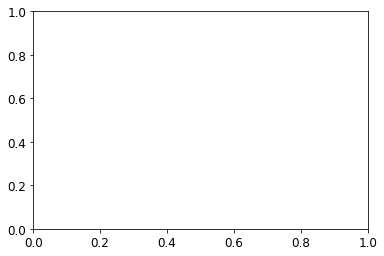

In [47]:
print("min\n")
print(statesData.min())
print("\nmax\n")
print(statesData.max())
print("\nmean\n")
print(statesData.mean(skipna=False))
print("\nmedian\n")
print(statesData.median())
print("\nstandard deviation\n")
print(statesData.std())

print("\nfirst quartile\n")
print(statesData.quantile(0.25))
print("\nsecond quartile\n")
print(statesData.quantile(0.75))
 
print("\nbox plot for cases\n")
bp = statesData.boxplot(column=["cases"])
plt.show()

print("\nbox plot for deaths\n")
statesData.boxplot(column=["deaths"])
plt.show()

print("\nbox plot for Cases per capita\n")
bp = statesData.boxplot(column=["cases_per_capita"])
plt.show()

print("\nbox plot for Deaths per capita\n")
bp = statesData.boxplot(column=["deaths_per_capita"])
plt.show()

In [ ]:
statesData.dtypes